<h1><center><strong>SD7502 Intelligent System Development</strong></center></h1>
<h1><center><Strong>Project 1<strong></center></h1>
<h2><center>Qiang Zhang 2173138</center></h2>
<h2><center>26 August 2021</center></h2>

<h2><strong>1. Multi-Classification of Digits with the EMNIST Dataset</strong></h2>

<h2>1.1 Load Digits Data</h2>

In [5]:
#Load emnist-digits.mat File
import os
from scipy import io as spio
emnist=spio.loadmat(os.getcwd()+"\emnist-digits.mat")
data=emnist['dataset']

<h2>1.2 Explore Digits Data</h2>

In [44]:
#Exployer Data
header=emnist['__header__']
version=emnist['__version__']
dataset=emnist['dataset']
print('Header:',header)
print('Version:',version)
print('Dataset:',dataset)

Header: b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Dec 20 07:38:31 2016'
Version: 1.0
Dataset: [[(array([[(array([[0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 ...,
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[8],
                 [9],
                 [6],
                 ...,
                 [1],
                 [1],
                 [0]], dtype=uint8), array([[3315],
                 [ 302],
                 [2136],
                 ...,
                 [1486],
                 [  43],
                 [3747]], dtype=uint16))                            ]],
        dtype=[('images', 'O'), ('labels', 'O'), ('writers', 'O')]), array([[(array([[0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 ...,
               

In [45]:
#Load training dataset
X_train = data['train'][0,0]['images'][0,0]
#Load training label 1000 samples
y_train = data['train'][0,0]['labels'][0,0]

#Load testing dataset
X_test = data['test'][0,0]['images'][0,0]
#Load testing label
y_test = data['test'][0,0]['labels'][0,0]

#Explor Train data and Test data
print('Dataset Type',type(data))
print('X Training Data Size',X_train.size)
print('X Training Data Shape', X_train.shape)
print('y Training Data Size',y_train.size)
print('y Training Data Shape', y_train.shape)
print('X Testing Data Size', X_test.size)
print('X Testing Data Shape', X_test.shape)
print('y Testing Data Size', y_test.size)
print('y Testing Data Shape', y_test.shape)

Dataset Type <class 'numpy.ndarray'>
X Training Data Size 188160000
X Training Data Shape (240000, 784)
y Training Data Size 240000
y Training Data Shape (240000, 1)
X Testing Data Size 31360000
X Testing Data Shape (40000, 784)
y Testing Data Size 40000
y Testing Data Shape (40000, 1)


<h2>1.3 Visualize Digits Data</h2>

In [46]:
#Reshape using matlab order
#Order could A, C, F. F for Display image vertically
v_X_train = X_train.reshape(X_train.shape[0],28, 28, order="F")
v_X_test = X_test.reshape(X_test.shape[0],28, 28, order="F")

print(v_X_train.shape)
print(y_train.shape)

(240000, 28, 28)
(240000, 1)


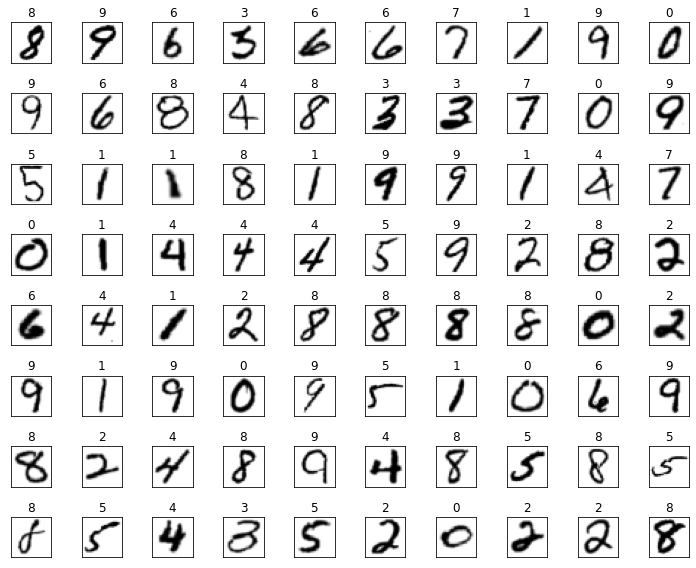

In [47]:
from random import randrange
import matplotlib.pyplot as plt
#display multiple images in the data set
figures, axes = plt.subplots(nrows=8, ncols=10, figsize=(10,8))
for item in zip(axes.flatten(), v_X_train, y_train.ravel()): 
    samplenumber = randrange(y_train.size)
    image = v_X_train[samplenumber]
    label=y_train[samplenumber][0]
    axes, image, label = item  
    axes.imshow(image, cmap=plt.cm.gray_r)  
    axes.set_xticks([])  # remove x-axis tick marks  
    axes.set_yticks([])  # remove y-axis tick marks  
    axes.set_title(label)
plt.tight_layout()
plt.show()

<h2>1.4 Hyperparameter Tuning for KNeighbrsClassifier</h2>

In [48]:
#Reload training dataset 1000 samples
X_train = data['train'][0,0]['images'][0,0][::1000]
#Reload training label 1000 samples
y_train = data['train'][0,0]['labels'][0,0][::1000]

#Reload testing dataset 1000 samples
X_test = data['test'][0,0]['images'][0,0][::1000]
#Reload testing label 1000 samples
y_test = data['test'][0,0]['labels'][0,0][::1000]

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

for n in range(3, 12, 1):
    for k in range(1, 20, 2):
        kfold = KFold(n_splits = n, random_state = 11, shuffle = True) 
        scores = cross_val_score(estimator = KNeighborsClassifier(n_neighbors = k), X = X_train, y = y_train.ravel(), cv = kfold)
        print(f'n = {n:<2}',f'k = {k:<2}',f'mean accuracy = {scores.mean():.2%}',f'std = {scores.std():.2%}')

n = 3  k = 1  mean accuracy = 78.75% std = 3.68%
n = 3  k = 3  mean accuracy = 73.75% std = 6.69%
n = 3  k = 5  mean accuracy = 72.92% std = 2.12%
n = 3  k = 7  mean accuracy = 70.00% std = 1.02%
n = 3  k = 9  mean accuracy = 67.08% std = 2.36%
n = 3  k = 11 mean accuracy = 67.50% std = 2.04%
n = 3  k = 13 mean accuracy = 65.42% std = 3.86%
n = 3  k = 15 mean accuracy = 63.33% std = 4.60%
n = 3  k = 17 mean accuracy = 61.25% std = 3.06%
n = 3  k = 19 mean accuracy = 60.42% std = 2.12%
n = 4  k = 1  mean accuracy = 80.42% std = 5.45%
n = 4  k = 3  mean accuracy = 74.17% std = 3.63%
n = 4  k = 5  mean accuracy = 75.00% std = 3.73%
n = 4  k = 7  mean accuracy = 70.42% std = 2.47%
n = 4  k = 9  mean accuracy = 71.67% std = 2.36%
n = 4  k = 11 mean accuracy = 72.50% std = 3.82%
n = 4  k = 13 mean accuracy = 70.83% std = 2.50%
n = 4  k = 15 mean accuracy = 67.50% std = 3.82%
n = 4  k = 17 mean accuracy = 63.33% std = 3.91%
n = 4  k = 19 mean accuracy = 64.17% std = 3.44%
n = 5  k = 1  mean a

<h2>1.5 Running Multiple Models to Find the Best Algorithm</h2>

In [50]:
#Comparing kNN, SVC, GaussianNB, LinerSVC ,SGDClassifier and Decison Tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn import tree

knn=KNeighborsClassifier(n_neighbors=1)
dt=tree.DecisionTreeClassifier

#Declare a dictionary named estimators
estimators = {'kNN':knn,
             'SVC':SVC(gamma = 'scale'),
             'GaussianNB': GaussianNB(),
             'LinearSVC':LinearSVC(),
             'SGDClassifier': SGDClassifier(max_iter=1000, tol=1e-3),
             'Decison Tree': dt()}

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits = 3, random_state = 11, shuffle = True) 
    scores = cross_val_score(estimator = estimator_object, X = X_train, y = y_train.ravel(), cv = kfold)
    print(f'{estimator_name:>20}',f'Mean Accuracy = {scores.mean():.2%}',f'Std = {scores.std():.2%}')

                 kNN Mean Accuracy = 78.75% Std = 3.68%
                 SVC Mean Accuracy = 79.17% Std = 6.56%
          GaussianNB Mean Accuracy = 41.25% Std = 3.06%
           LinearSVC Mean Accuracy = 75.83% Std = 5.24%
       SGDClassifier Mean Accuracy = 81.25% Std = 2.70%
        Decison Tree Mean Accuracy = 44.17% Std = 4.60%


<h2>1.6 Performance Testing the Best Algorithm</h2>

In [6]:
#Reload Whole training dataset 
X_train = data['train'][0,0]['images'][0,0]
#Reload Whole training label
y_train = data['train'][0,0]['labels'][0,0]

#Reload Whole testing dataset
X_test = data['test'][0,0]['images'][0,0]
#Reload Whole testing label
y_test = data['test'][0,0]['labels'][0,0]

#Check Train data and Test data are whole data
print('Dataset Type',type(data))
print('X Training Data Size',X_train.size)
print('X Training Data Shape', X_train.shape)
print('y Training Data Size',y_train.size)
print('y Training Data Shape', y_train.shape)
print('X Testing Data Size', X_test.size)
print('X Testing Data Shape', X_test.shape)
print('y Testing Data Size', y_test.size)
print('y Testing Data Shape', y_test.shape)

Dataset Type <class 'numpy.ndarray'>
X Training Data Size 188160000
X Training Data Shape (240000, 784)
y Training Data Size 240000
y Training Data Shape (240000, 1)
X Testing Data Size 31360000
X Testing Data Shape (40000, 784)
y Testing Data Size 40000
y Testing Data Shape (40000, 1)


<h3>1.6.1 SVC Training Model</h3>

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time
start_time=time.time()
kfold = KFold(n_splits = 3, random_state = 11, shuffle = True) 
scores = cross_val_score(SVC(gamma='scale'), X = X_train, y = y_train.ravel(), cv = kfold)
print(f'SVC Mean Accuracy = {scores.mean():.2%}')
print(f'SVC Std = {scores.std():.2%}')
print("SVC Time Consumption:","%.2f Seconds" % (time.time()-start_time))

SVC Mean Accuracy = 98.80%
SVC Std = 0.03%
SVC Time Consumption: 6069.88 Seconds


<h3>1.6.2 kNN Training Model</h3>

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time
start_time=time.time()
kfold = KFold(n_splits = 3, random_state = 11, shuffle = True) 
scores = cross_val_score(KNeighborsClassifier(n_neighbors=1), X = X_train, y = y_train.ravel(), cv = kfold)
print(f'kNN Mean Accuracy = {scores.mean():.2%}')
print(f'kNN Std = {scores.std():.2%}')
print("kNN Time Consumption:","%.2f Seconds" % (time.time()-start_time))


kNN Mean Accuracy = 98.19%
kNN Std = 0.04%
kNN Time Consumption: 1208.48 Seconds


<h3>1.6.3 SGD Classifier Training Model</h3>

In [54]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time
start_time=time.time()
kfold = KFold(n_splits = 3, random_state = 11, shuffle = True) 
scores = cross_val_score(SGDClassifier(max_iter=1000, tol=1e-3), X = X_train, y = y_train.ravel(), cv = kfold)
print(f'SGDClassifier Mean Accuracy = {scores.mean():.2%}')
print(f'SGDClassifier Std = {scores.std():.2%}')
print("SGDClassifier Time Consumption:","%.2f Seconds" % (time.time()-start_time))

SGDClassifier Mean Accuracy = 89.08%
SGDClassifier Std = 0.20%
SGDClassifier Time Consumption: 2035.03 Seconds


<h2><strong>2. Multi-Classification of Letters with the EMNIST Dataset</strong></h2>

<h2>2.1 Load Letters Data</h2>

In [2]:
#Load EMNIST Dataset
import os
from scipy import io as spio
emnist=spio.loadmat(os.getcwd()+"\emnist-letters.mat")
data=emnist['dataset']

<h2>2.2 Explore Letters Data</h2>

In [56]:
#Exployer Data
header=emnist['__header__']
version=emnist['__version__']
dataset=emnist['dataset']
print('Header:',header)
print('Version:',version)
print('Dataset:',dataset)

Header: b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 24 22:21:15 2017'
Version: 1.0
Dataset: [[(array([[(array([[0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 ...,
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[23],
                 [ 7],
                 [16],
                 ...,
                 [13],
                 [15],
                 [19]], dtype=uint8), array([[1234],
                 [ 799],
                 [3444],
                 ...,
                 [ 785],
                 [ 208],
                 [ 875]], dtype=uint16))                             ]],
        dtype=[('images', 'O'), ('labels', 'O'), ('writers', 'O')]), array([[(array([[0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 ...,
        

In [57]:
#Load training dataset 
X_train = data['train'][0,0]['images'][0,0]
#Load training label
y_train = data['train'][0,0]['labels'][0,0]

#Load testing dataset
X_test = data['test'][0,0]['images'][0,0]
#Load testing label
y_test = data['test'][0,0]['labels'][0,0]

#Explor Train data and Test data
print('Dataset Type',type(data))
print('X Training Data Size',X_train.size)
print('X Training Data Shape', X_train.shape)
print('y Training Data Size',y_train.size)
print('y Training Data Shape', y_train.shape)
print('X Testing Data Size', X_test.size)
print('X Testing Data Shape', X_test.shape)
print('y Testing Data Size', y_test.size)
print('y Testing Data Shape', y_test.shape)

Dataset Type <class 'numpy.ndarray'>
X Training Data Size 97843200
X Training Data Shape (124800, 784)
y Training Data Size 124800
y Training Data Shape (124800, 1)
X Testing Data Size 16307200
X Testing Data Shape (20800, 784)
y Testing Data Size 20800
y Testing Data Shape (20800, 1)


<h2>2.3 Visualize Letters Data</h2>

In [58]:
#Reshape using matlab order
#Order could A, C, F. F for Display image vertically
v_X_train = X_train.reshape(X_train.shape[0],28, 28, order="F")
v_X_test = X_test.reshape(X_test.shape[0],28, 28, order="F")

print(v_X_train.shape)
print(y_train.shape)

(124800, 28, 28)
(124800, 1)


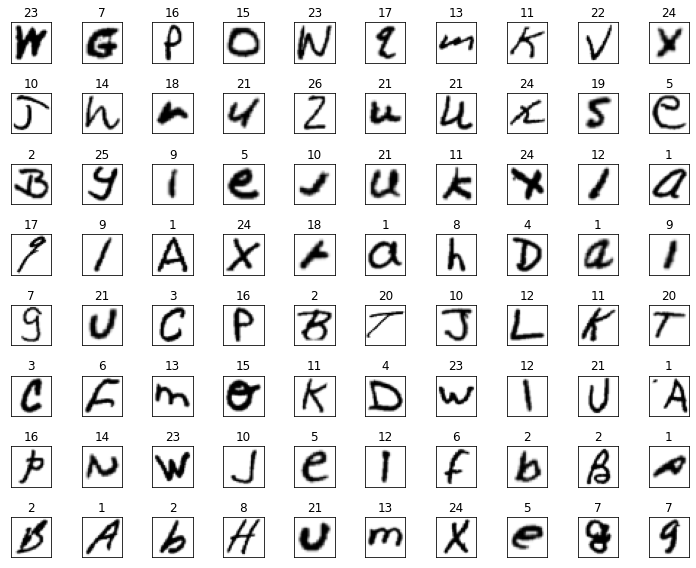

In [59]:
from random import randrange
import matplotlib.pyplot as plt
#display multiple images in the data set
figures, axes = plt.subplots(nrows=8, ncols=10, figsize=(10,8))
for item in zip(axes.flatten(), v_X_train, y_train.ravel()): 
    samplenumber = randrange(y_train.size)
    image = v_X_train[samplenumber]
    label=y_train[samplenumber][0]
    axes, image, label = item  
    axes.imshow(image, cmap=plt.cm.gray_r)  
    axes.set_xticks([])  # remove x-axis tick marks  
    axes.set_yticks([])  # remove y-axis tick marks  
    axes.set_title(label)
plt.tight_layout()
plt.show()

<h2>2.4 Hyperparameter Tuning for KNeighbrsClassifier</h2>

In [60]:
#Reload training dataset 1000 samples
X_train = data['train'][0,0]['images'][0,0][::1000]
#Reload training label 1000 samples
y_train = data['train'][0,0]['labels'][0,0][::1000]

#Reload testing dataset 1000 samples
X_test = data['test'][0,0]['images'][0,0][::1000]
#Reload testing label 1000 samples
y_test = data['test'][0,0]['labels'][0,0][::1000]

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

for n in range(3, 12, 1):
    for k in range(1, 20, 2):
        kfold = KFold(n_splits = n, random_state = 11, shuffle = True) 
        scores = cross_val_score(estimator = KNeighborsClassifier(n_neighbors = k), X = X_train, y = y_train.ravel(), cv = kfold)
        print(f'n = {n:<2}',f'k = {k:<2}',f'mean accuracy = {scores.mean():.2%}',f'std = {scores.std():.2%}')

n = 3  k = 1  mean accuracy = 24.02% std = 3.53%
n = 3  k = 3  mean accuracy = 20.00% std = 1.03%
n = 3  k = 5  mean accuracy = 20.81% std = 1.26%
n = 3  k = 7  mean accuracy = 20.07% std = 6.57%
n = 3  k = 9  mean accuracy = 12.06% std = 5.36%
n = 3  k = 11 mean accuracy = 16.03% std = 3.14%
n = 3  k = 13 mean accuracy = 15.20% std = 1.05%
n = 3  k = 15 mean accuracy = 13.57% std = 2.87%
n = 3  k = 17 mean accuracy = 12.81% std = 2.33%
n = 3  k = 19 mean accuracy = 12.81% std = 2.33%
n = 4  k = 1  mean accuracy = 27.29% std = 11.64%
n = 4  k = 3  mean accuracy = 25.66% std = 4.20%
n = 4  k = 5  mean accuracy = 20.09% std = 7.80%
n = 4  k = 7  mean accuracy = 23.31% std = 9.62%
n = 4  k = 9  mean accuracy = 18.50% std = 10.85%
n = 4  k = 11 mean accuracy = 18.47% std = 9.02%
n = 4  k = 13 mean accuracy = 15.25% std = 6.67%
n = 4  k = 15 mean accuracy = 16.86% std = 4.89%
n = 4  k = 17 mean accuracy = 16.89% std = 6.68%
n = 4  k = 19 mean accuracy = 15.27% std = 7.05%
n = 5  k = 1  mean

<h2>2.5 Running Multiple Models to Find the Best Algorithm</h2>

In [62]:
#Comparing kNN, SVC, GaussianNB, LinerSVC ,SGDClassifier and Decison Tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn import tree

knn=KNeighborsClassifier(n_neighbors=1)
dt=tree.DecisionTreeClassifier

#Declare a dictionary named estimators
estimators = {'kNN':knn,
             'SVC':SVC(gamma = 'scale'),
             'GaussianNB': GaussianNB(),
             'LinearSVC':LinearSVC(),
             'SGDClassifier': SGDClassifier(max_iter=1000, tol=1e-3),
             'Decison Tree': dt()}

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits = 3, random_state = 11, shuffle = True) 
    scores = cross_val_score(estimator = estimator_object, X = X_train, y = y_train.ravel(), cv = kfold)
    print(f'{estimator_name:>20}',f'Mean Accuracy = {scores.mean():.2%}',f'Std = {scores.std():.2%}')

                 kNN Mean Accuracy = 24.02% Std = 3.53%
                 SVC Mean Accuracy = 18.51% Std = 10.11%
          GaussianNB Mean Accuracy = 21.72% Std = 10.69%
           LinearSVC Mean Accuracy = 26.42% Std = 3.54%
       SGDClassifier Mean Accuracy = 21.60% Std = 3.90%
        Decison Tree Mean Accuracy = 20.03% Std = 3.23%


<h2>2.6 Performance Testing the Best Algorithm</h2>

In [3]:
#Reload Whole training dataset 
X_train = data['train'][0,0]['images'][0,0]
#Reload Whole training label
y_train = data['train'][0,0]['labels'][0,0]

#Reload Whole testing dataset
X_test = data['test'][0,0]['images'][0,0]
#Reload Whole testing label
y_test = data['test'][0,0]['labels'][0,0]

#Check Train data and Test data are whole data
print('Dataset Type',type(data))
print('X Training Data Size',X_train.size)
print('X Training Data Shape', X_train.shape)
print('y Training Data Size',y_train.size)
print('y Training Data Shape', y_train.shape)
print('X Testing Data Size', X_test.size)
print('X Testing Data Shape', X_test.shape)
print('y Testing Data Size', y_test.size)
print('y Testing Data Shape', y_test.shape)

Dataset Type <class 'numpy.ndarray'>
X Training Data Size 97843200
X Training Data Shape (124800, 784)
y Training Data Size 124800
y Training Data Shape (124800, 1)
X Testing Data Size 16307200
X Testing Data Shape (20800, 784)
y Testing Data Size 20800
y Testing Data Shape (20800, 1)


<h3>2.6.1 LinearSVC Training Model</h3>

In [4]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time
start_time=time.time()
kfold = KFold(n_splits = 3, random_state = 11, shuffle = True) 
scores = cross_val_score(LinearSVC(), X = X_train, y = y_train.ravel(), cv = kfold)
print(f'LinearSVC Mean Accuracy = {scores.mean():.2%}')
print(f'LinearSVC Std = {scores.std():.2%}')
print("LinearSVC Time Consumption:","%.2f Seconds" % (time.time()-start_time))

C:\Users\qiang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\qiang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC Mean Accuracy = 47.87%
LinearSVC Std = 3.38%
LinearSVC Time Consumption: 2730.13 Seconds


C:\Users\qiang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<h3>2.6.2 kNN Training Model</h3>

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time
start_time=time.time()
kfold = KFold(n_splits = 3, random_state = 11, shuffle = True) 
scores = cross_val_score(KNeighborsClassifier(n_neighbors=1), X = X_train, y = y_train.ravel(), cv = kfold)
print(f'kNN Mean Accuracy = {scores.mean():.2%}')
print(f'kNN Std = {scores.std():.2%}')
print("kNN Time Consumption:","%.2f Seconds" % (time.time()-start_time))

kNN Mean Accuracy = 84.91%
kNN Std = 0.20%
kNN Time Consumption: 390.69 Seconds


<h3>2.6.3 SGD Classifier Training Model</h3>

In [66]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time
start_time=time.time()
kfold = KFold(n_splits = 3, random_state = 11, shuffle = True) 
scores = cross_val_score(SGDClassifier(max_iter=1000, tol=1e-3), X = X_train, y = y_train.ravel(), cv = kfold)
print(f'SGDClassifier Mean Accuracy = {scores.mean():.2%}')
print(f'SGDClassifier Std = {scores.std():.2%}')
print("SGDClassifier Time Consumption:","%.2f Seconds" % (time.time()-start_time))

SGDClassifier Mean Accuracy = 52.35%
SGDClassifier Std = 0.42%
SGDClassifier Time Consumption: 1923.56 Seconds
